<a href="https://colab.research.google.com/github/ash-01xor/Exploratory-Data-Analysis/blob/main/HousePrices-AdvancedRegressionTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Prices Advanced Regression Techniques:**

#### **If you find the notebook useful , feel free to upvote**

## **Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

### **Loading Data**

In [ ]:
train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv",index_col=0)
test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv",index_col=0)
sample_sub = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [ ]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### **Describing the data**

In [ ]:
print("No of rows and columns in training data:",train_data.shape)
print("No of rows and columns in testing data:",test_data.shape)

No of rows and columns in training data: (1460, 80)
No of rows and columns in testing data: (1459, 79)


In [ ]:
#creating a individual variable to store the target feature
y = train_data[['SalePrice']]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### **Splitting into numerical and categorical variables:**

In [ ]:
n_val = train_data.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).copy()
print(n_val.columns)
l=[]
for i in n_val:
  l.append(i)
print("Total no of numerical variables:",len(l))

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Total no of numerical variables: 36


In [ ]:
c_val = train_data.select_dtypes(include=['object']).copy()
c_val['MSSubClass'] = train_data['MSSubClass']
print(c_val.columns)
l=[]
for i in c_val:
  l.append(i)
print("Total no of categorical variables:",len(l))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')
Total no of categorical variables: 44


## **Univariate Analysis:**

### **<u>Numerical variables:</u>**

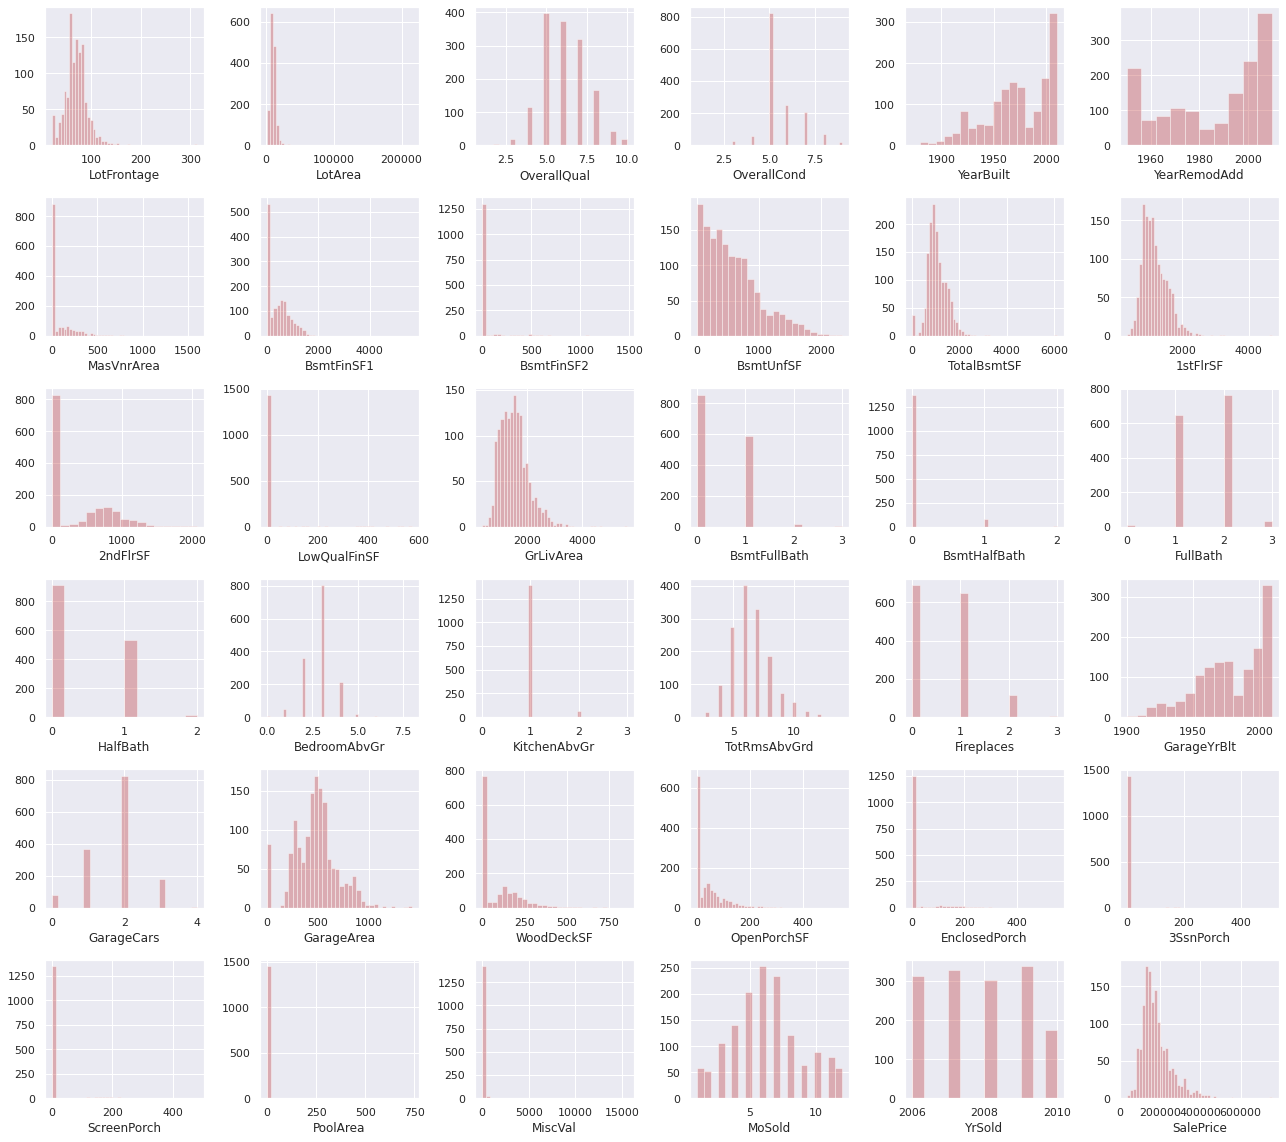

In [ ]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(n_val):
    plt.subplot(6,6,index+1)
    sns.distplot(n_val.loc[:,col].dropna(), kde=False,color='r')
fig.tight_layout(pad=1.0)

From the given plots we can tell that certain numerical variables have only one kind of value:


-  **BsmtFinSF2**
-  **EnclosedPorch**
- **LowQualFinSF**
-  **3SsnPorch**
-  **ScreenPorch**
- **PoolArea**
-  **MiscVal**

Most of the values present in these variables are 0, thus these features can be cleared during the data preprocessing step.



### **Categorical Variables:**

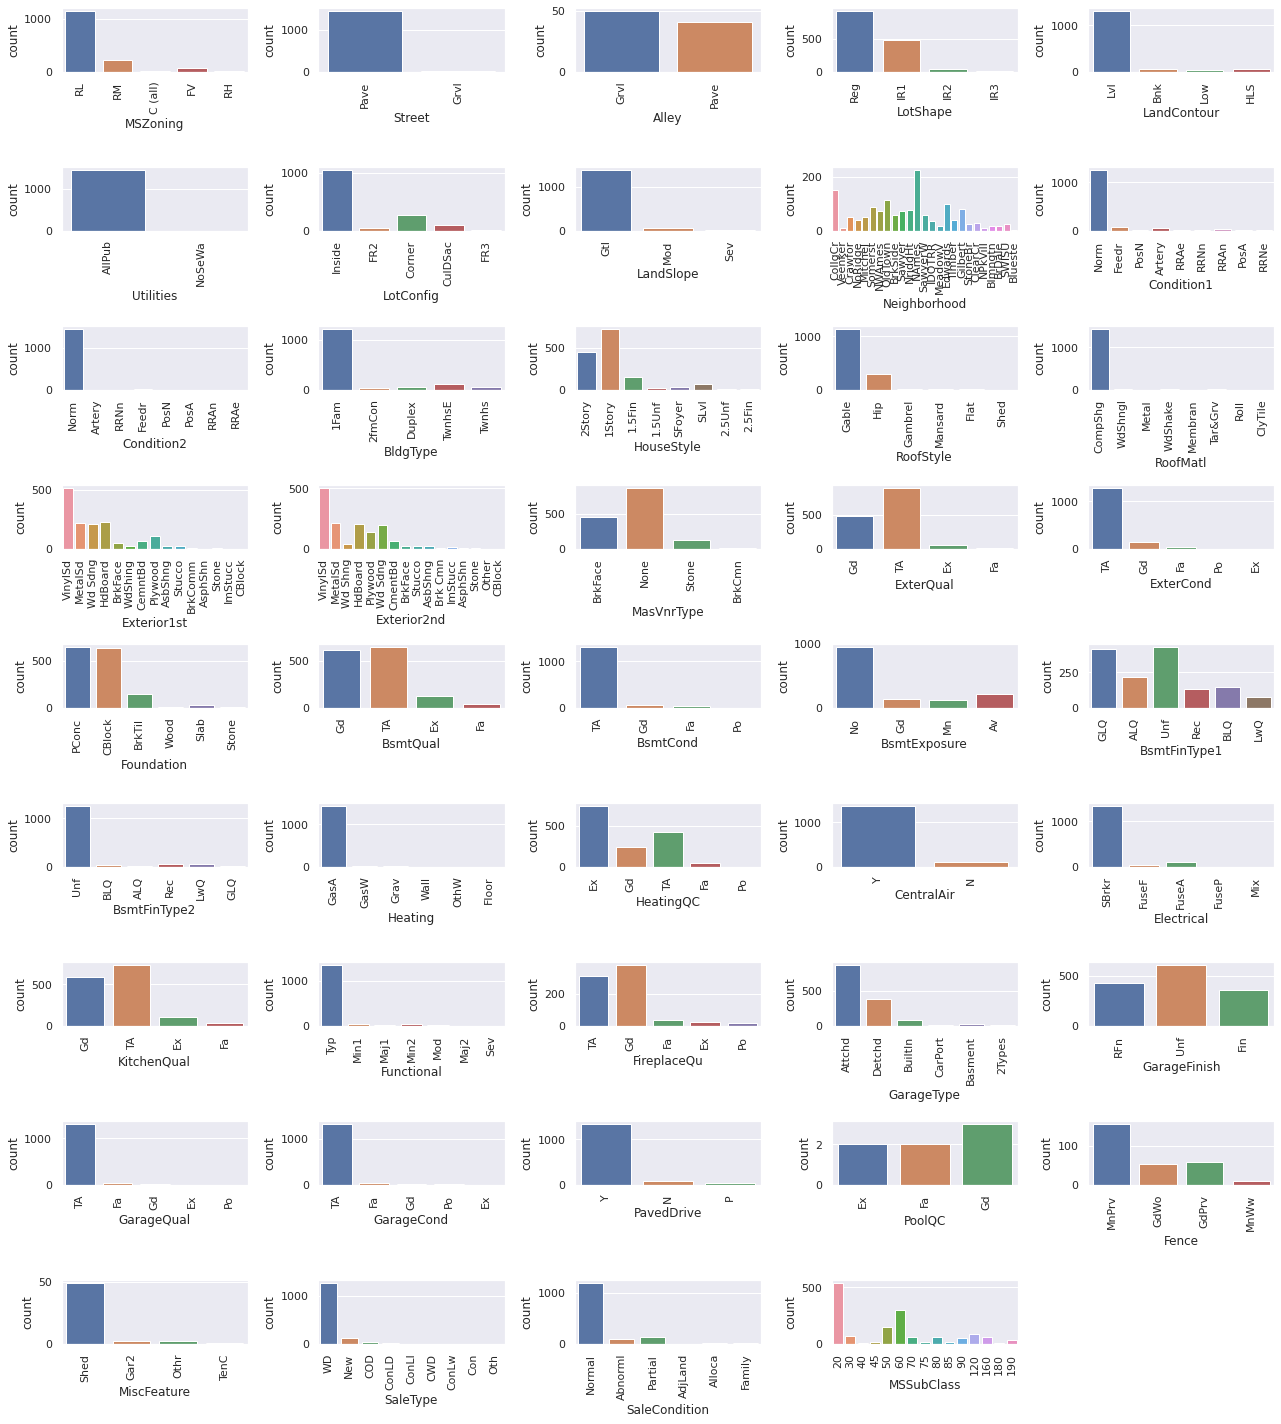

In [ ]:
fig = plt.figure(figsize=(18,20))
for index in range(len(c_val.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=c_val.iloc[:,index], data=c_val.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.2)

From the given plots we can tell that certain categorical features have only one kind of value:


*   **Condition2**
*   **Heating**
*   **RoofMatl**
*   **Utilites**
*   **Functional**


These consist of only one value hence we can remove these features in the data preprocessing step



### **Bivariate Analysis:**

<AxesSubplot:>

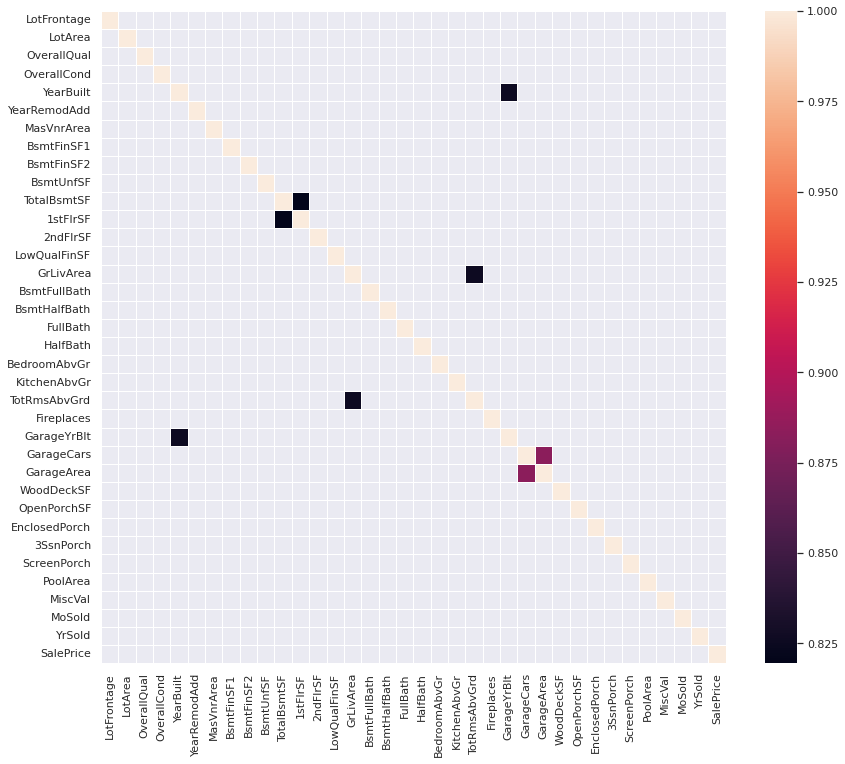

In [ ]:
plt.figure(figsize=(14,12))
correlation = n_val.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5)

From the given correlation matrix we can infer the highly correlated features:

-  **GarageYrBlt and YearBuilt**
- **TotRmsAbvGrd and GrLivArea**
- **1stFlrSF and TotalBsmtSF**
- **GarageArea and GarageCars**





We need to find the numerical features which have high correlation to the target variable 'SalePrice'

In [ ]:
nfeatures_corr = n_val.corr()['SalePrice'][:-1]
high_fealist = nfeatures_corr[abs(nfeatures_corr)> 0.5].sort_values(ascending=False)
print("HIGHLY CORRELATED FEATURES:\n")
print(high_fealist)

HIGHLY CORRELATED FEATURES:

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Finding the relation between the numerical features and the target variables:

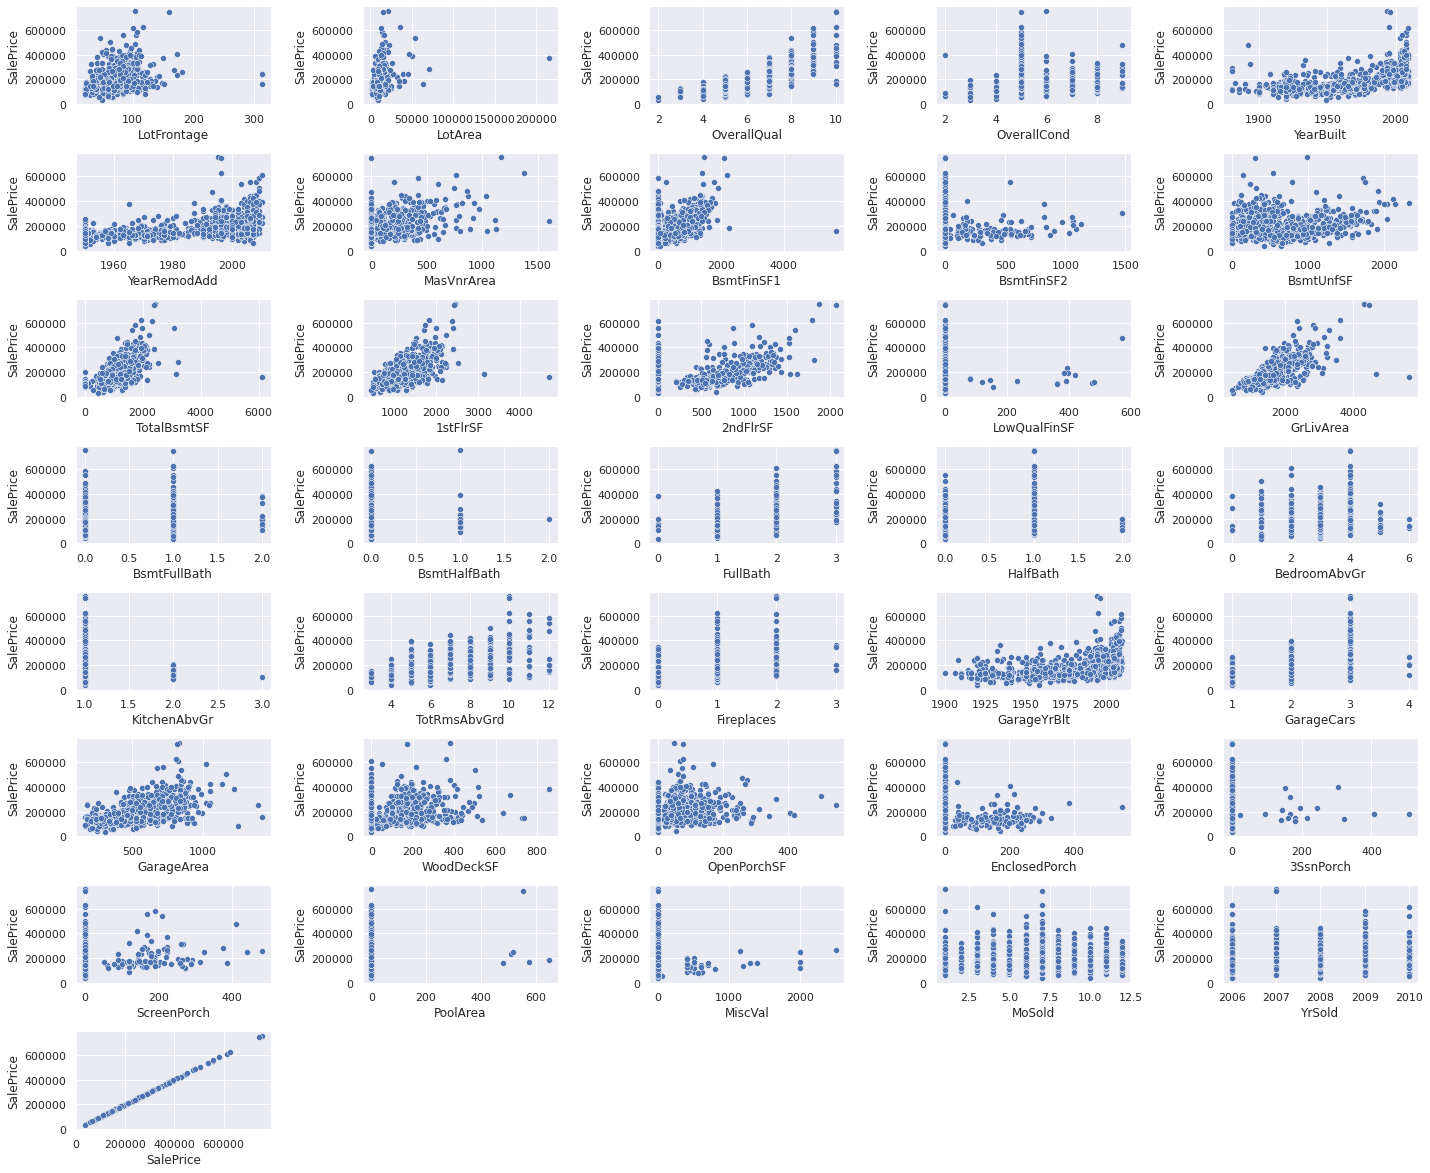

In [ ]:
fig = plt.figure(figsize=(20,20))
for index in range(len(n_val.columns)):
    plt.subplot(10,5,index+1)
    sns.scatterplot(x=n_val.iloc[:,index], y='SalePrice', data=n_val.dropna())
fig.tight_layout(pad=1.0)

### **Data Processing:**

We will first drop the highly correlated features which we already found out

In [ ]:
train_data.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)

From the above scatterplots for various features we can see that
- MoSold
- YrSold

does not have any linear relationship with the target variable hence we can drop them

In [ ]:
train_data.drop(['MoSold','YrSold'], axis=1, inplace=True)

Dropping the features with consists of lots of missing values cause they are redundant

<AxesSubplot:title={'center':'Number of missing rows'}, xlabel='features', ylabel='sum'>

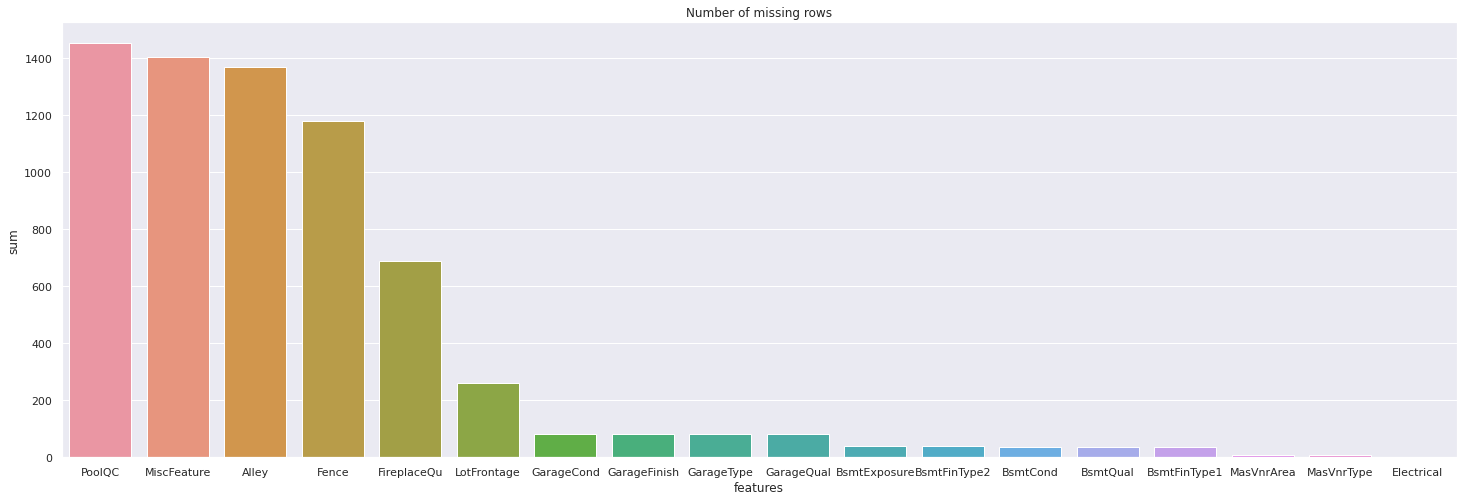

In [ ]:
plt.figure(figsize=(25,8))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(train_data.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(18).reset_index()
missing_count.columns = ['features','sum']
sns.barplot(x='features',y='sum', data = missing_count)

From the given distribution we can infer that the features named:
*   PoolQC
*   MiscFeature
- Alley

consists of lots of missing values and hence can be removed



In [ ]:
train_data.drop(['PoolQC','MiscFeature','Alley'], axis=1, inplace=True)

### **Removing Constant features:**

We will be dropping both
- Numerical Variables
- Categorical Variables

which consists of large number of one kind of value's or 0.

In [ ]:
#for numerical variables
nval_col = train_data.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).columns
overfit_nvals = []
for i in nval_col:
    counts = train_data[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train_data) * 100 > 95:
        overfit_nvals.append(i)
overfit_nvals = list(overfit_nvals)
train_data = train_data.drop(overfit_nvals, axis=1)

In [ ]:
#for categorical variables
cval_col = train_data.select_dtypes(include=['object']).columns
overfit_cvals = []
for i in cval_col:
    counts = train_data[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train_data) * 100 > 95:
        overfit_cvals.append(i)
overfit_cvals = list(overfit_cvals)
train_data = train_data.drop(overfit_cvals, axis=1)

In [ ]:
#printing constant features
print("Dropped the following Constant numerical features:\n",overfit_nvals) 
print("Dropped the following Constant categorical features:\n",overfit_cvals) 

Dropped the following Constant numerical features:
 ['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']
Dropped the following Constant categorical features:
 ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']


### **Dealing with outliers:**

In [ ]:
#checking the total amount of null values in columns present in the training data
train_data.isnull().sum().T

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
LotShape            0
                 ... 
ScreenPorch         0
Fence            1179
SaleType            0
SaleCondition       0
SalePrice           0
Length: 61, dtype: int64

In [ ]:
#the total number of numerical features after dropping certain features based on certain criteria
print(len(nval_col))

30


Creating box-plots to find the outliers for the numerical features

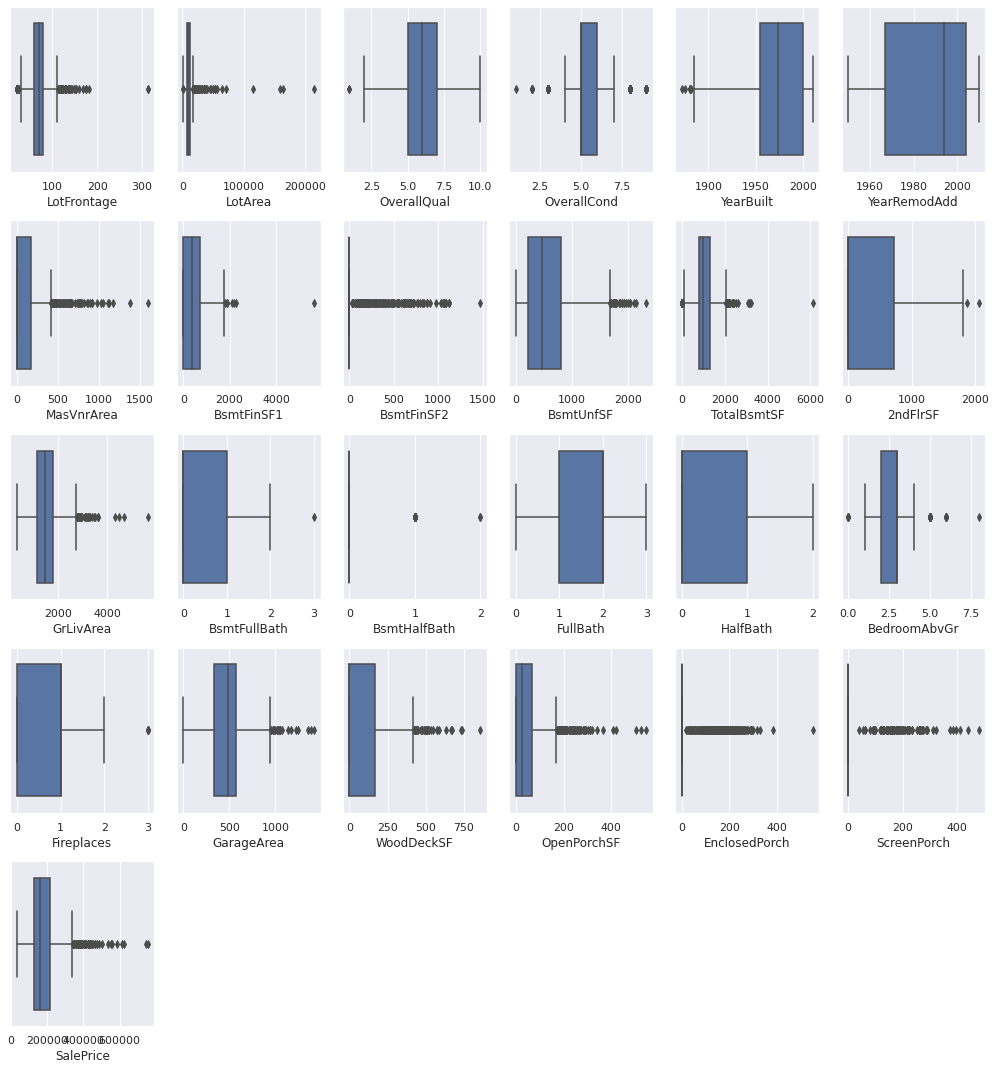

In [ ]:
nval_col1 = train_data.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).copy()
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(nval_col1):
    plt.subplot(5,6,index+1)
    sns.boxplot(nval_col1.loc[:,col].dropna())
fig.tight_layout(pad=1.0)

From the given boxplots , we can infer that certain numerical features have extreme outliers thus we would be removing those outliers.

In [ ]:
train_data = train_data.drop(train_data[train_data['LotFrontage'] > 200].index)
train_data = train_data.drop(train_data[train_data['LotArea'] > 100000].index)
train_data = train_data.drop(train_data[train_data['BsmtFinSF1'] > 4000].index)
train_data = train_data.drop(train_data[train_data['TotalBsmtSF'] > 5000].index)
train_data = train_data.drop(train_data[train_data['GrLivArea'] > 4000].index)
train_data = train_data.drop(train_data[train_data['Fireplaces'] > 2.5].index)

### **Missing values:**

#### Finding the missing values:

In [ ]:
#find the total no of missing values
train_data.isnull().sum().sum()

2642

In [ ]:
#finding the missing values in features
missval = train_data.isnull().sum()
missval = missval[missval>0]
missval.sort_values(ascending=False)

Fence           1169
FireplaceQu      690
LotFrontage      255
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64

In [ ]:
#view of the total number of missing values and the percentage of missing values in each column
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
Fence,1169,0.807878
FireplaceQu,690,0.476849
LotFrontage,255,0.176227
GarageCond,81,0.055978
GarageType,81,0.055978
GarageQual,81,0.055978
GarageFinish,81,0.055978
BsmtFinType2,38,0.026261
BsmtExposure,38,0.026261
BsmtQual,37,0.025570


In [ ]:
print('Features size:', train_data.shape)

Features size: (1447, 61)


### **Imputing the missing values:**

**Ordinal Features:**
Replacing the missing values with 'NA'

In [ ]:
#we are filling
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Fence','FireplaceQu','MasVnrType']:
    train_data[col] = train_data[col].fillna('NA')

**Nominal Features:**
Replacing the missing value of the categorical features with the most frequently occuring values

In [ ]:
cols = ["MasVnrArea","MasVnrType", "Exterior1st", "Exterior2nd", "SaleType", "Electrical"]
train_data[cols] = train_data.groupby("Neighborhood")[cols].transform(lambda x: x.fillna(x.mode()[0]))

**Numerical Feature:**
Replacing the missing values with the mean or median depending upon the distribution of the variable

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

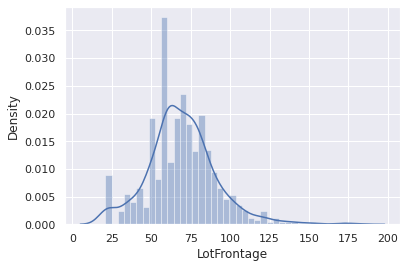

In [ ]:
sns.distplot(train_data['LotFrontage'])

From the given distribution we are able to infer that the distribution is slightly right skewed and hence the missing values of the feature 'LotFrontage' can be replaced with the median of the values.

In [ ]:
train_data['LotFrontage'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
#checking the null values in dataset after imputation
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MSSubClass,0,0.0
BsmtUnfSF,0,0.0
HeatingQC,0,0.0
CentralAir,0,0.0
Electrical,0,0.0
...,...,...
BsmtCond,0,0.0
BsmtExposure,0,0.0
BsmtFinType1,0,0.0
BsmtFinSF1,0,0.0


### **Feature Engineering:**

**Chaning the datatype of the feature MSSubClass:**

In [ ]:
train_data['MSSubClass'] = train_data['MSSubClass'].apply(str)

**Mapping ordinal features:**

In [ ]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fin_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

In [ ]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu']
for col in ord_col:
    train_data[col] = train_data[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    train_data[col] = train_data[col].map(fin_map)
    
train_data['BsmtExposure'] = train_data['BsmtExposure'].map(exposure_map)
train_data['Fence'] = train_data['Fence'].map(fence_map)

**Converting Categorical to Numerical Features:**

In [ ]:
train_data = pd.get_dummies(train_data)

**Distribution of Saleprice:**

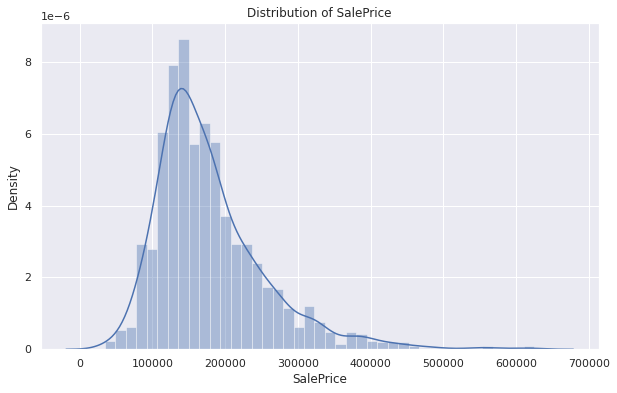

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Distribution of SalePrice")
dist = sns.distplot(train_data['SalePrice'],norm_hist=False)

* From the above plot we can infer that the target variable has a skewed distribution ,which would affect the model.
* Hence we would apply log transformation on the target variable thus reducing the skewness of the distribution.

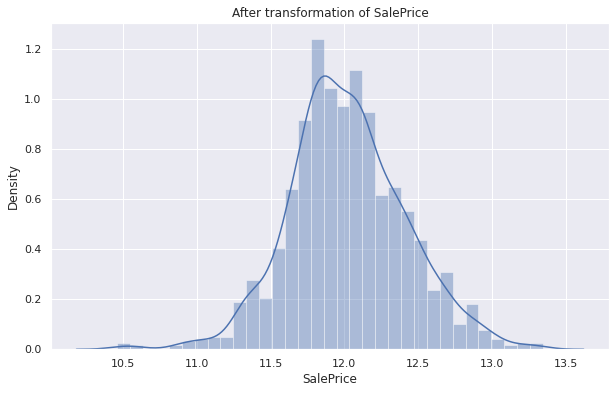

In [ ]:
plt.figure(figsize=(10,6))
plt.title("After transformation of SalePrice")
dist = sns.distplot(np.log(train_data['SalePrice']),norm_hist=False)

In [ ]:
y["SalePrice"] = np.log(y['SalePrice'])

#### **Well Thanks for viewing the notebook and if you find the notebook useful ,feel free to upvote!**